In [ ]:
%pip install torch
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install torchvision

In [ ]:
from resnet import ResNet

net = ResNet(9, shortcuts=True)
print(net)

### ResNet Training and testing on CIFAR10 with 20 layers and 20 epochs

In [ ]:
from train_test_func import train_net
from data_loader import get_data_loaders
from torchvision import transforms
from DatasetPicker import DatasetPicker

if __name__ == '__main__':
    

    data_dir = 'data/cifar10'
    batch_size = 128




    # Normalisation parameters fo CIFAR10
    means = [0.4918687901200927, 0.49185976472299225, 0.4918583862227116]
    stds  = [0.24697121702736, 0.24696766978537033, 0.2469719877121087]

    normalize = transforms.Normalize(
        mean=means,
        std=stds,
    )

    train_transform = transforms.Compose([ 
        # 4 pixels are padded on each side, 
        transforms.Pad(4),
        # a 32×32 crop is randomly sampled from the 
        # padded image or its horizontal flip.
        transforms.RandomHorizontalFlip(0.5),
        transforms.RandomCrop(32),
        transforms.ToTensor(),
        normalize
    ])

    test_transform = transforms.Compose([
        # For testing, we only evaluate the single 
        # view of the original 32×32 image.
        transforms.ToTensor(),
        normalize
    ])

    dataset = DatasetPicker.CIFAR10

    train_loader, test_loader = get_data_loaders(
                data_dir,
                batch_size,
                train_transform,
                test_transform,
                dataset,
                shuffle=True,
                num_workers=4,
                pin_memory=True,
            )

    is_grayscale = False
    if dataset == DatasetPicker.FASHION_MNIST:
        is_grayscale = True
    
    train_net(n=3, epochs=20, train_loader=train_loader, test_loader=test_loader, is_grayscale=is_grayscale)

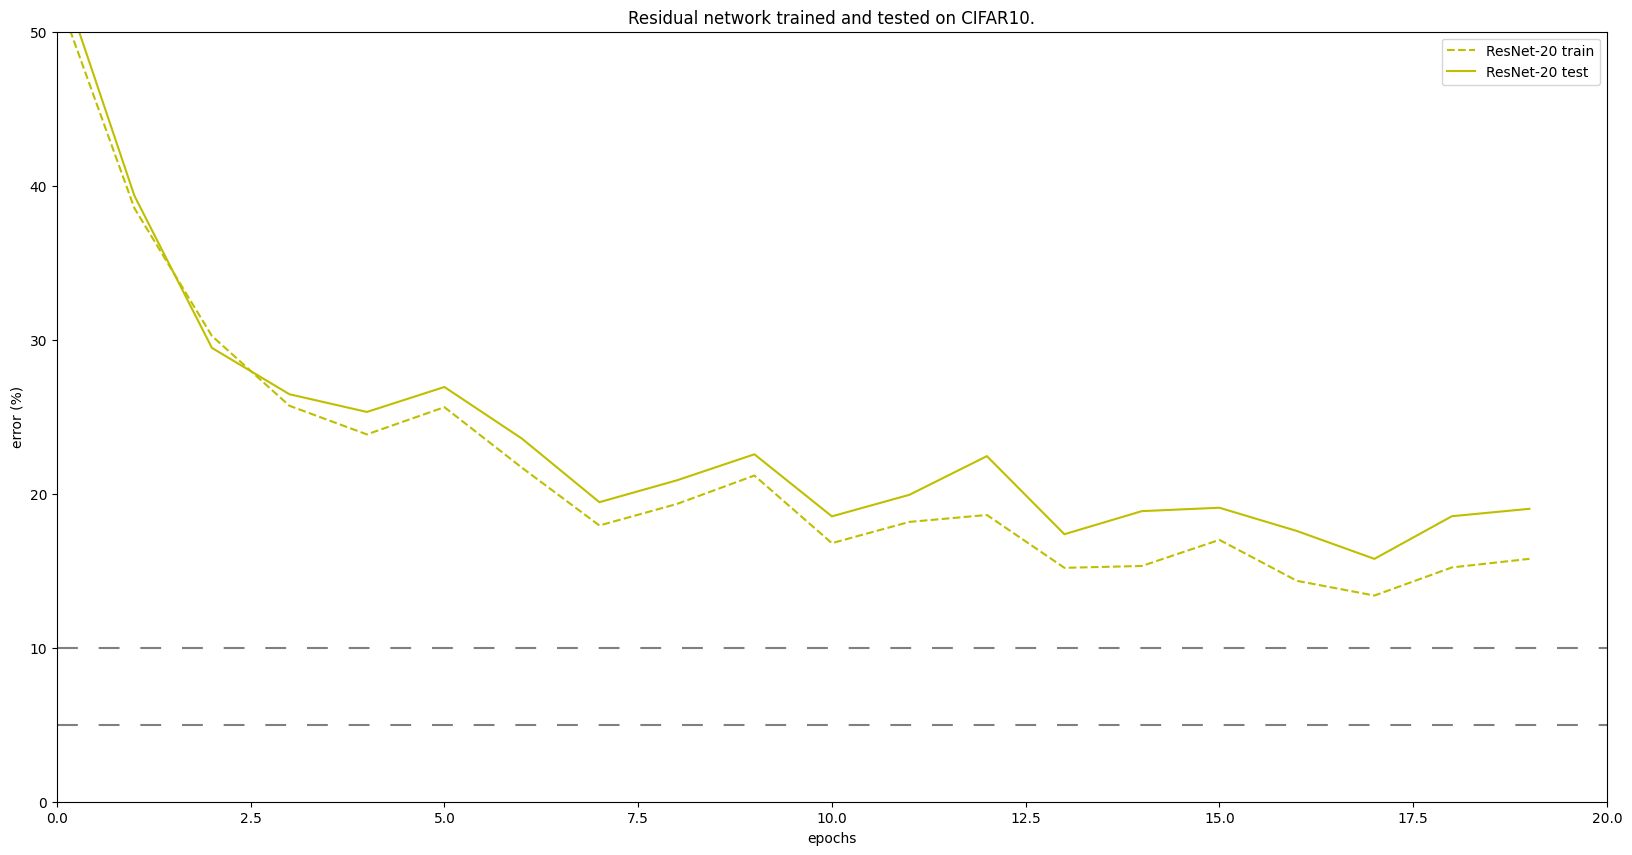

In [14]:
from train_test_func import train_net
from data_loader import get_data_loaders
from torchvision import transforms
from DatasetPicker import DatasetPicker
import pandas as pd
import matplotlib.pyplot as plt

if __name__ == '__main__':
    ns  = [3]
    clr = ['y']

    resnet_dfs = [pd.read_csv(f'results/resnet_{6*n+2}.csv') for n in ns]
    fig = plt.figure(figsize=(20, 10))
    plt.axis([0, 20, 0, 50])


    for i in range(len(ns)):
        plt.plot(resnet_dfs[i]['epoch'], resnet_dfs[i]['train_err']*100, f'{clr[i]}--',
                label=f'ResNet-{6*ns[i]+2} train')
        plt.plot(resnet_dfs[i]['epoch'], resnet_dfs[i]['test_err']*100, f'{clr[i]}',
                label=f'ResNet-{6*ns[i]+2} test')

    plt.title('Residual network trained and tested on CIFAR10.')
    plt.legend(loc='upper right')
    plt.xlabel('epochs')
    plt.ylabel('error (%)')
    plt.axhline(10, color='black', alpha=0.5, dashes=(10., 10.))
    plt.axhline(5, color='black', alpha=0.5, dashes=(10., 10.))




### ResNet training and testing on FASHIONMNST with 20 layers and 20 epochs

In [ ]:
from train_test_func import train_net
from data_loader import get_data_loaders
from torchvision import transforms
from DatasetPicker import DatasetPicker

if __name__ == '__main__':
    

    data_dir = 'data/cifar10'
    batch_size = 128




    # Normalisation parameters fo CIFAR10
    means = [0.4918687901200927, 0.49185976472299225, 0.4918583862227116]
    stds  = [0.24697121702736, 0.24696766978537033, 0.2469719877121087]

    normalize = transforms.Normalize(
        mean=means,
        std=stds,
    )

    train_transform = transforms.Compose([ 
        # 4 pixels are padded on each side, 
        transforms.Pad(4),
        # a 32×32 crop is randomly sampled from the 
        # padded image or its horizontal flip.
        transforms.RandomHorizontalFlip(0.5),
        transforms.RandomCrop(32),
        transforms.ToTensor(),
        normalize
    ])

    test_transform = transforms.Compose([
        # For testing, we only evaluate the single 
        # view of the original 32×32 image.
        transforms.ToTensor(),
        normalize
    ])

    dataset = DatasetPicker.FASHION_MNIST

    train_loader, test_loader = get_data_loaders(
                data_dir,
                batch_size,
                train_transform,
                test_transform,
                dataset,
                shuffle=True,
                num_workers=4,
                pin_memory=True,
            )

    is_grayscale = False
    if dataset == DatasetPicker.FASHION_MNIST:
        is_grayscale = True
    
    train_net(n=3, epochs=20, train_loader=train_loader, test_loader=test_loader, is_grayscale=is_grayscale)

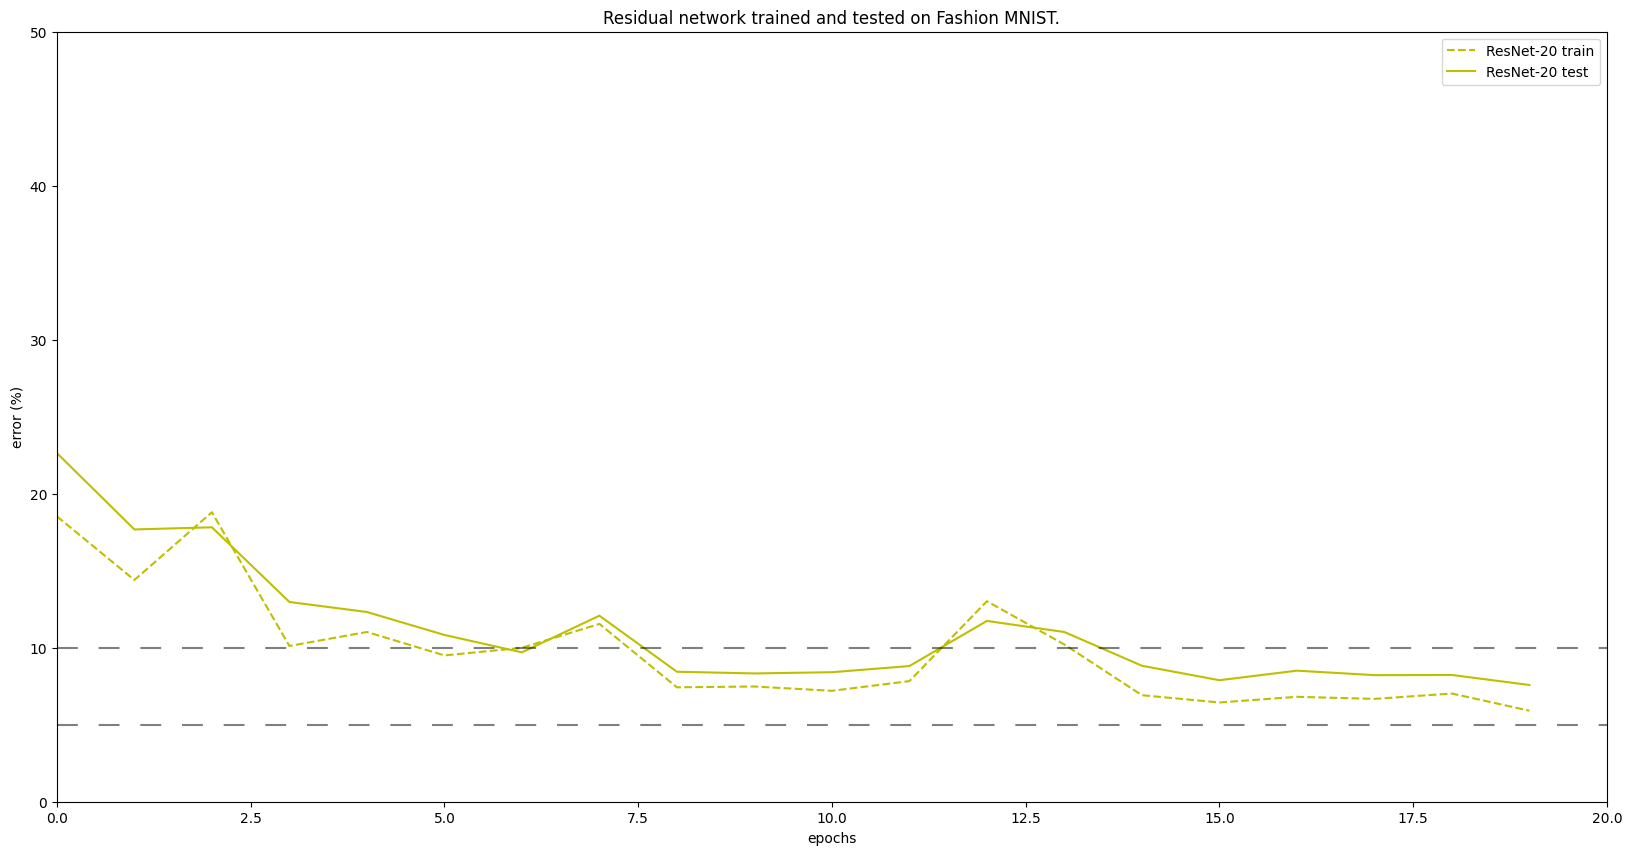

In [16]:
from train_test_func import train_net
from data_loader import get_data_loaders
from torchvision import transforms
from DatasetPicker import DatasetPicker
import pandas as pd
import matplotlib.pyplot as plt

if __name__ == '__main__':
    ns  = [3]
    clr = ['y']

    resnet_dfs = [pd.read_csv(f'results/resnet_{6*n+2}.csv') for n in ns]
    fig = plt.figure(figsize=(20, 10))
    plt.axis([0, 20, 0, 50])


    for i in range(len(ns)):
        plt.plot(resnet_dfs[i]['epoch'], resnet_dfs[i]['train_err']*100, f'{clr[i]}--',
                label=f'ResNet-{6*ns[i]+2} train')
        plt.plot(resnet_dfs[i]['epoch'], resnet_dfs[i]['test_err']*100, f'{clr[i]}',
                label=f'ResNet-{6*ns[i]+2} test')

    plt.title('Residual network trained and tested on Fashion MNIST.')
    plt.legend(loc='upper right')
    plt.xlabel('epochs')
    plt.ylabel('error (%)')
    plt.axhline(10, color='black', alpha=0.5, dashes=(10., 10.))
    plt.axhline(5, color='black', alpha=0.5, dashes=(10., 10.))

In [18]:
import time
import datetime

start = time.time()

time.sleep(.1)

end = time.time()

print("It took", end-start, datetime.timedelta(seconds=end-start), "")


It took 0.10107135772705078 0:00:00.101071 
